In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('./results/manual_data1/calibration_image_data.csv', sep=',',decimal='.')
df.head()

,img_num,target_aruco,img_name,carriage_x_dist,carriage_y_dist,carriage_x_undist,carriage_y_undist,carriage_x_dist_warp,carriage_y_dist_warp,carriage_x_undist_warp,...,target_x_undist,target_y_undist,target_x_dist_warp,target_y_dist_warp,target_x_undist_warp,target_y_undist_warp,angle_dist,angle_undist,angle_dist_warp,angle_undist_warp
0,1,13,img_1,544.5,992.5,553.0,977.0,400.31912,562.67110,404.95688,...,1217.0,956.0,1067.9042,535.9816,1075.6592,533.5369,-45.318967,-44.965699,-45.724640,-45.371082
1,2,13,img_2,766.5,1279.0,779.5,1263.0,628.63520,853.44150,636.84656,...,1217.0,956.0,1067.9042,535.9816,1075.6592,533.5369,-80.865582,-81.058877,-81.381218,-81.594101
2,3,13,img_3,1098.0,1389.0,1113.5,1372.5,965.78076,963.85480,975.10920,...,1217.0,956.0,1067.9042,535.9816,1075.6592,533.5369,-112.082651,-112.521870,-112.468086,-112.970047
3,4,13,img_4,1514.0,1196.5,1530.0,1183.5,1384.80680,766.92880,1393.20030,...,1217.0,956.0,1067.9042,535.9816,1075.6592,533.5369,-151.987874,-152.078318,-152.130371,-152.306992
4,5,13,img_5,1514.5,398.5,1527.0,392.0,1378.65440,-43.00896,1383.22790,...,1217.0,956.0,1067.9042,535.9816,1075.6592,533.5369,132.190351,132.707685,131.770874,132.289185


In [4]:
df['cos_dist']=np.cos(df['angle_dist']*np.pi/180)
df['sin_dist']=np.sin(df['angle_dist']*np.pi/180)
df['cos_undist']=np.cos(df['angle_undist']*np.pi/180)
df['sin_undist']=np.sin(df['angle_undist']*np.pi/180)
df['cos_dist_warp']=np.cos(df['angle_dist_warp']*np.pi/180)
df['sin_dist_warp']=np.sin(df['angle_dist_warp']*np.pi/180)
df['cos_undist_warp']=np.cos(df['angle_undist_warp']*np.pi/180)
df['sin_undist_warp']=np.sin(df['angle_undist_warp']*np.pi/180)

x = df[['target_x_undist', 'target_y_undist', 'cos_undist', 'sin_undist']]
y = df[['carriage_x_undist','carriage_y_undist']]

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, stratify=df['target_aruco'])

# Linear regressor

In [6]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [7]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

27.418522776737596 0.9990701679906473


Text(0.5, 1.0, 'true vs predicted')

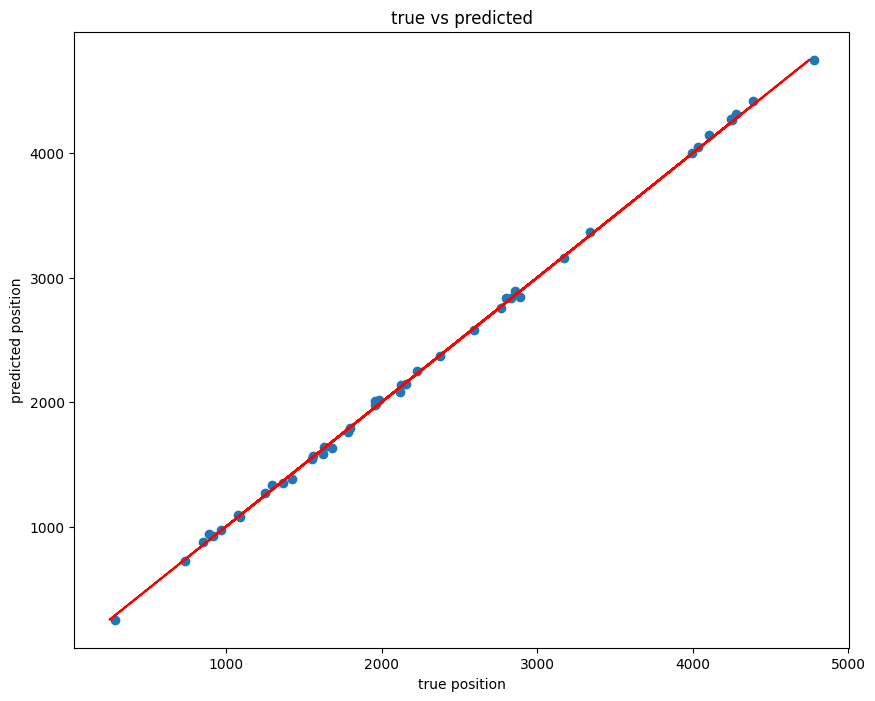

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('true position')
plt.ylabel('predicted position')
plt.title('true vs predicted')

# Quadratic regressor

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.fit_transform(x_test)

model=linear_model.LinearRegression()
model.fit(x_poly_train,y_train)
y_pred=model.predict(x_poly_test)

In [10]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

30.61603131084827 0.9989374012292906


Text(0.5, 1.0, 'true vs predicted')

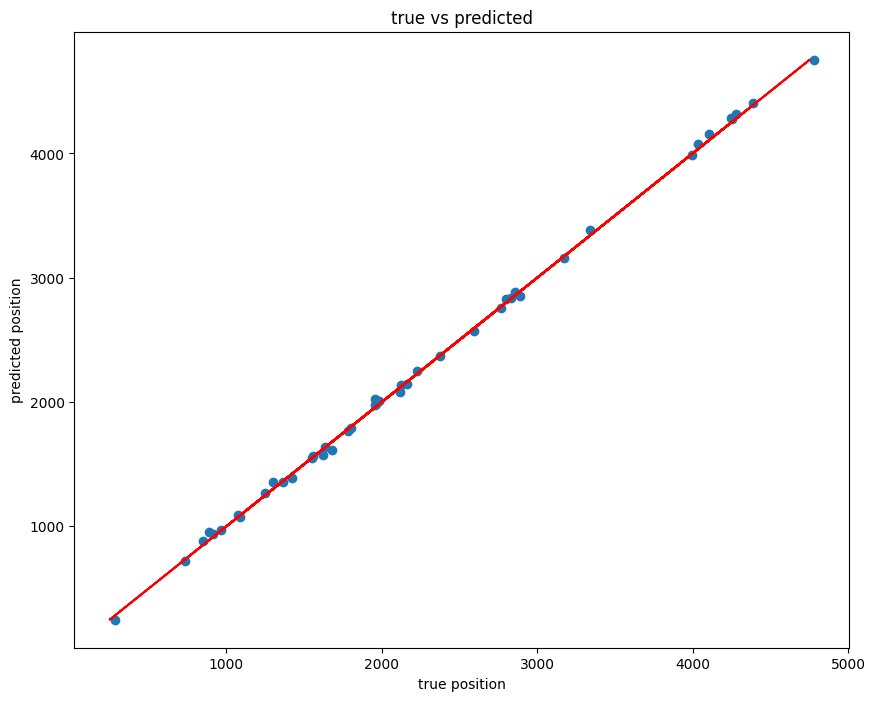

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('true position')
plt.ylabel('predicted position')
plt.title('true vs predicted')

# Cubic regressor

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.fit_transform(x_test)

model=linear_model.LinearRegression()
model.fit(x_poly_train,y_train)
y_pred=model.predict(x_poly_test)

In [13]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

7.062381995595715 0.9999241079068188


Text(0.5, 1.0, 'true vs predicted')

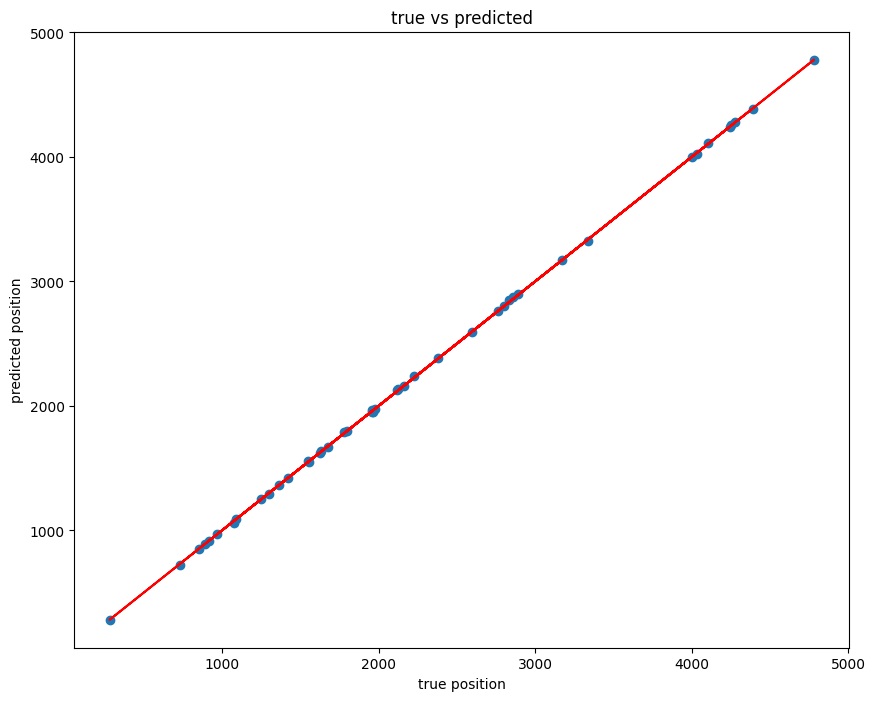

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('true position')
plt.ylabel('predicted position')
plt.title('true vs predicted')

### Test cubic regressor

In [15]:
#data from outside dataset
angle=-7.115031246911888
x0=np.array([[ 1672.0, 1861.5,  np.cos(angle*np.pi/180), np.sin(angle*np.pi/180)]])
x_poly=poly.fit_transform(x0)
y_pred=model.predict(x_poly)
y_pred
# it should be (1081.0, 1795.0)

array([[1073.37966858, 1789.25681346]])